In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# algorithms
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('C:/Users/ACER/Desktop/pull github repo/LIE-Thomas-1.26/content/additional_resources/datasets/US Income/cleaned/data_train.csv')
test_df = pd.read_csv('C:/Users/ACER/Desktop/pull github repo/LIE-Thomas-1.26/content/additional_resources/datasets/US Income/cleaned/data_test.csv')

#original
#train_df =  pd.read_csv('C:/Users/ACER/Desktop/pull github repo/LIE-Thomas-1.26/content/additional_resources/datasets/US Income/original/data_train.csv')
#test_df =  pd.read_csv('C:/Users/ACER/Desktop/pull github repo/LIE-Thomas-1.26/content/additional_resources/datasets/US Income/original/data_test.csv')


df1 = train_df.copy()
df2 = test_df.copy()

In [3]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [5]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df1.shape

(32561, 15)

In [7]:
df1.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


C:\Users\ACER\anaconda3\envs\myvirtualenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'sex'}, xlabel='sex', ylabel='Density'>

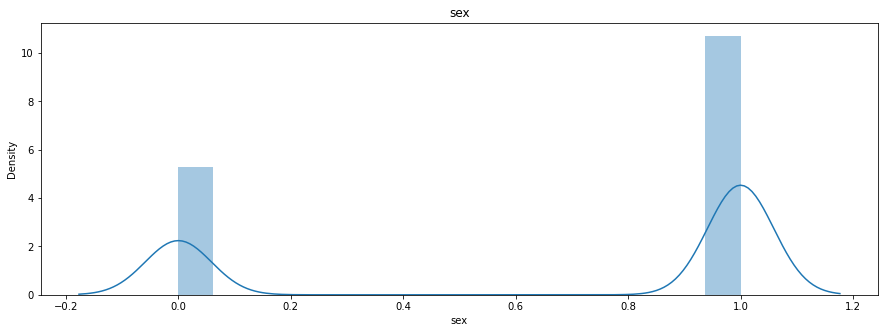

In [28]:
#print(df1.groupby(['sex']).count())
#df1['sex'].count()
plt.figure(figsize=(15,5))
plt.title('sex')
sns.distplot(df1["sex"])

<AxesSubplot:xlabel='sex', ylabel='income'>

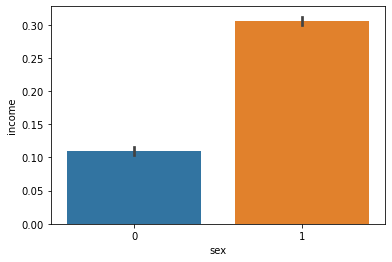

In [9]:
sns.barplot(x='sex', y='income', data=df1)

<AxesSubplot:xlabel='income', ylabel='count'>

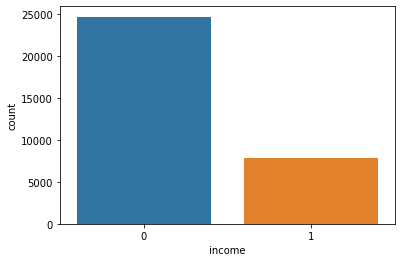

In [10]:
# Number of people in each category of income
sns.countplot(x='income', data=df1)

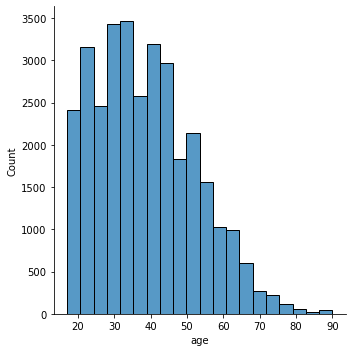

In [11]:
# https://medium.com/analytics-vidhya/tuning-random-forest-algorithm-to-predict-income-14005371656e
#sns.__version__

sns.displot(df1, x="age", bins=20)

<AxesSubplot:xlabel='count', ylabel='education'>

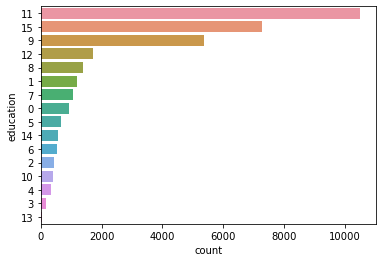

In [12]:
sns.countplot(data=df1, y='education', order=df1['education'].value_counts().index)

<AxesSubplot:xlabel='education-num', ylabel='count'>

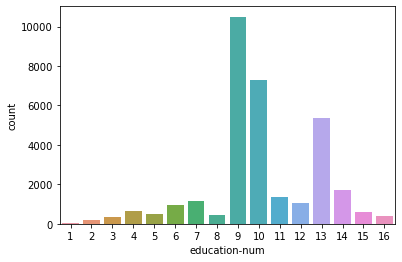

In [13]:
sns.countplot(data=df1, x='education-num')

income
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

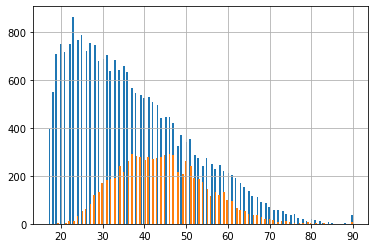

In [14]:
df1.groupby('income').age.hist(bins=180)

In [22]:
# Building ML models
X_train = df1.drop('income', axis=1)
Y_train = df1['income']
X_test = df2.drop('income', axis=1).copy()
Y_test = df2['income']

In [23]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

result = pd.DataFrame({
    'Model': ['Random Forest'],
    'Score': [acc_random_forest]
})
result.head()

,Model,Score
0,Random Forest,99.99


In [24]:
random_forest.score(X_test, Y_prediction)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

In [25]:
result = pd.DataFrame({
    'Model': ['Random Forest'],
    'Score': [acc_random_forest]
})
result.head()

,Model,Score
0,Random Forest,85.62


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_prediction, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:


NameError: name 'Y_pred_ran_for' is not defined

In [26]:
# K-Fold cross validation:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84771262 0.86271499 0.85749386 0.8470516  0.85565111 0.85749386
 0.85872236 0.86117936 0.86332924 0.85749386]
Mean: 0.8568842840104738
Standard Deviation: 0.005299031884391503


In [ ]:
'''
Great quality of random forest is that they make it very easy to measure
the relative importance of each feature.
'''
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
importances.plot.bar()

In [ ]:
# df1  = df1.drop("race", axis=1)
# df2  = df2.drop("not_alone", axis=1)

# df1  = df1.drop("Parch", axis=1)
# df2  = df2.drop("Parch", axis=1)

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=30, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

In [ ]:
'''
The more features you have, the more likely your model will suffer from
overfitting and vice versa.
'''
# Out-of-bag samples
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Precision:', precision_score(Y_train, predictions))
print('Recall:', recall_score(Y_train, predictions))

In [ ]:
# F-score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [ ]:
# ROC AUC curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

In [ ]:
from sklearn.model_selection import train_test_split

labels = np.array(df1['income'])
df1_list = list(df1.columns)
train_df1, test_df1, train_labels, test_labels = train_test_split(df1, labels, test_size=.25, random_state=42)

In [ ]:
print('Training Features Shape:', train_df1.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df1.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
'''
Establish baseline
Before we can make and evaluate predictions, we need to establish a baseline,
a sensible measure that we hope to beat with our model.
'''
baseline_preds = df2[:, df1_list.index('income')]

baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [ ]:
# https://medium.com/@umagunturi789/adult-income-prediction-using-python-1d716f700b4e
